# Aufgabe 2

## Teilaufgabe a)

In [1]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Generates the next number of the sequence 
# generated by a linear congruental generator.
def lcg(x, a, b, m):
    return (a*x + b) % m

In [3]:
# Setting the params of the lcg used here
b = 3
m = 1024
a_max = 40 
# create an empty list. Periodenlängen contains the period length for each a.
periodenlängen = []; 
for a in range(a_max):
    x_i = 0 # We set x_0 = 0 for this part of the exercise
    producedNumbers = []; 
    # In producedNumbers we story the so far generated numbers to compare them. 
    # If a number is generated twice we have found the period length.
    for i in range(2000):
        if x_i not in producedNumbers:
            producedNumbers.append(x_i)
        else:
            periodenlängen.append(i);
            break
        x_i = lcg(x_i, a, b, m) # Generate the next number.

periodenlängen = np.asarray(periodenlängen, dtype=np.float32) 
# Convert the list to a numpy array.

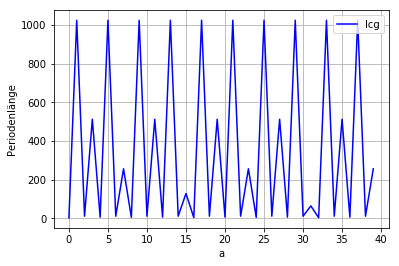

In [4]:
# We want to plot period length L against the paramter a.
alinspace = np.linspace(0, a_max-1, a_max) 
plt.plot(alinspace, periodenlängen, 'b-', label='lcg')
plt.grid()
plt.legend()
plt.xlabel('a')
plt.ylabel('Periodenlänge')
plt.show()

Die maximale Periodenlänge beträgt 1024 und tritt auf für $a = 1,5,9, ...$ ,
denn dann ist $a-1$ durch 2 und 4 teilbar.


## Teilaufgabe b)

In [5]:
plt.clf()
a = 1601
b = 3456
m = 10000

pValues:  [0.99990252157281312, 0.99990252157281312, 0.99990252157281312, 0.99990252157281312, 0.99990252157281312, 0.99990252157281312, 0.99990252157281312, 0.99990252157281312, 0.99990252157281312, 0.99990252157281312]


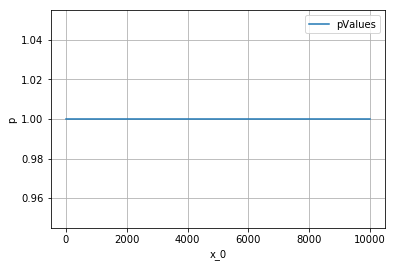

In [6]:
pValues = []
for x_i in range(0,10000,1000):
    histArray = [x_i/m]
    # Array, that contains the random numbers.
    for i in range(10000):
        x_i = lcg(x_i, a, b, m)
        histArray.append(x_i/m)
    # This bins the data in an array
    binnedData = np.histogram(histArray, bins=10, range=(0,1))[0] 
    # Calculates p-value of chi-squared-test. 
    # p-value close to 1 => probably uniform.
    pValue = stats.chisquare(binnedData)[1]    
    pValues.append(pValue)

print('pValues: ', pValues)

plt.plot(np.linspace(0,10000,10), pValues, label='pValues')
plt.grid()
plt.legend()
plt.xlabel('x_0')
plt.ylabel('p')
plt.show()

Der Chi-Quadrat-Test zegit, dass der Zufallsgenerator eine gute Gleichverteilung liefert (perfekte Gleichverteilung hat p-Wert von 1). Das Ergebnis hängt nicht vom Startwert ab.

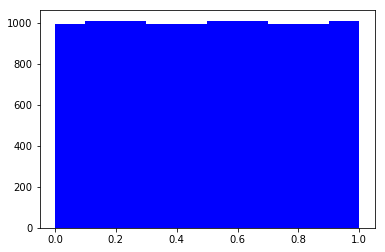

In [7]:
# random numbers depicted in a histogram.
plt.clf()
plt.hist(histArray, bins=10, range=(0,1),
         histtype='stepfilled', label='uniform hist', color='b')
plt.show()

Das Histogramm zeigt eine gute Gleichverteilung.

## Teilaufgabe c)

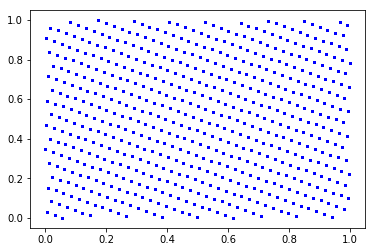

In [8]:
x_i = 0
# generate random numbers.
randomNumbers = []
for i in range(10000):
        x_i = lcg(x_i, a, b, m)
        randomNumbers.append(x_i/m)

# the random numbers are splitted to build the pairs and tripletts
x_numbers = randomNumbers.copy()
del x_numbers[-2:]
del randomNumbers[0]
y_numbers = randomNumbers.copy()
del y_numbers[-1]
del randomNumbers[0]
z_numbers = randomNumbers.copy()

plt.plot(x_numbers, y_numbers, 'b.', markersize=3)
plt.show()

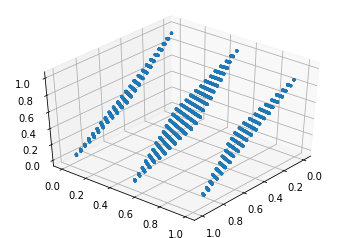

In [9]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.view_init(40, 40) # Elevation, Rotation
ax.scatter(
x_numbers, y_numbers, z_numbers,
lw=0, # no lines around points
s=10, # smaller points
)

plt.show()

Es ist deutlich zu erkennen, dass die Zahlen von einander abhängen und einem bestimmten Muster folgen. Diese Beobachtung spricht gegen den Zufallsgenerator.

## Teilaufgabe d)

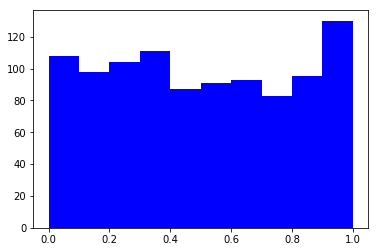

In [10]:
randomNumbers2 = np.random.uniform(0,1,1000)

plt.clf()
plt.hist(randomNumbers2, bins=10, range=(0,1),
         histtype='stepfilled', label='uniform hist', color='b')
plt.show()

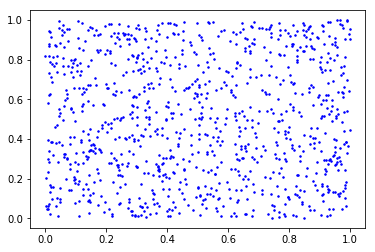

In [11]:
# the random numbers are splitted to build the pairs and tripletts
x_numbers2 = randomNumbers2.copy()
x_numbers2 = np.delete(x_numbers2, -1)
x_numbers2 = np.delete(x_numbers2, -1)
randomNumbers2 = np.delete(randomNumbers2, 0)
y_numbers2 = randomNumbers2.copy()
y_numbers2 = np.delete(y_numbers2, -1)
randomNumbers2 = np.delete(randomNumbers2, 0)
z_numbers2 = randomNumbers2.copy()

plt.plot(x_numbers2, y_numbers2, 'b.', markersize=3)
plt.show()


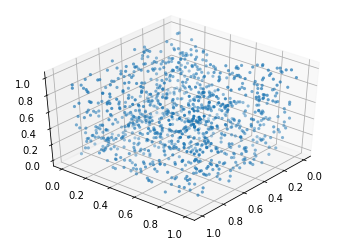

In [12]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.view_init(40, 40) # Elevation, Rotation
ax.scatter(
x_numbers2, y_numbers2, z_numbers2,
lw=0, # no lines around points
s=10, # smaller points
)

plt.show()

In den Plots ist kein Muster zu erkennen, die Zahlen sind unabhängig voneinander. numpy.random.uniform() liefert eine bessere Gleichverteilung.

## e)

In [13]:
a = 1601
b = 3456
m = 10000


for x_i in range(0,10000,1000):
    x_0 = x_i
    count = 0
    histArray2 = [x_i/m]
    for i in range(10000):
        x_i = lcg(x_i, a, b, m)
        histArray2.append(x_i/m)
        if x_i/m == 0.5:
            count += 1
    print('Wert von x_0: ', x_0, 'Anzahl von 1/2: ', count)
    




Wert von x_0:  0 Anzahl von 1/2:  0
Wert von x_0:  1000 Anzahl von 1/2:  16
Wert von x_0:  2000 Anzahl von 1/2:  0
Wert von x_0:  3000 Anzahl von 1/2:  16
Wert von x_0:  4000 Anzahl von 1/2:  0
Wert von x_0:  5000 Anzahl von 1/2:  16
Wert von x_0:  6000 Anzahl von 1/2:  0
Wert von x_0:  7000 Anzahl von 1/2:  16
Wert von x_0:  8000 Anzahl von 1/2:  0
Wert von x_0:  9000 Anzahl von 1/2:  16
